# LGBM & XGBM

# Importing necessary libraries 

In [1]:
!pip install xgboost 

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis (EDA):

In [2]:
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

In [3]:
# Check for missing values
print("Missing values in training data:")
print(df_train.isnull().sum())
print("Missing values in testing data:")
print(df_test.isnull().sum())

Missing values in training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values in testing data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Data Vizualisation

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Sex Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


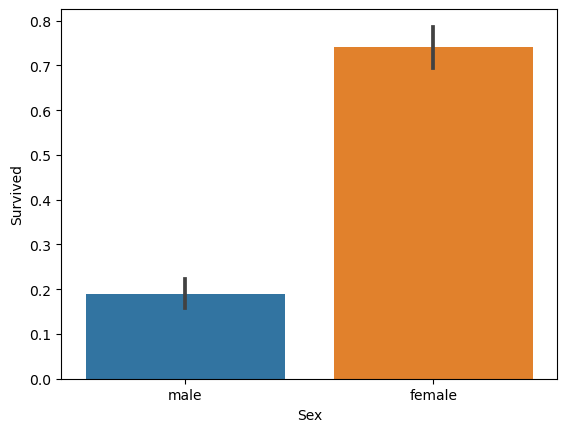

In [6]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df_train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", df_train["Survived"][df_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df_train["Survived"][df_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

It shows females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


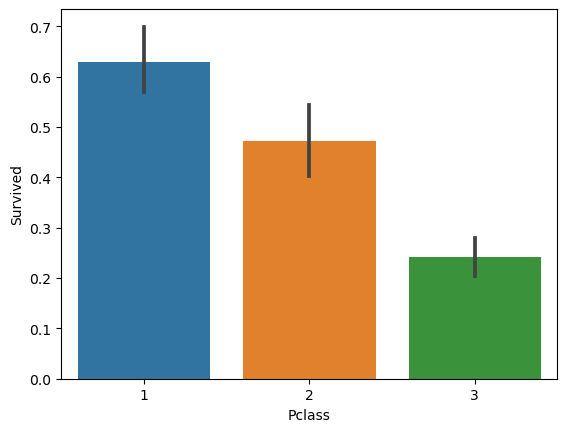

In [7]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=df_train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

People with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


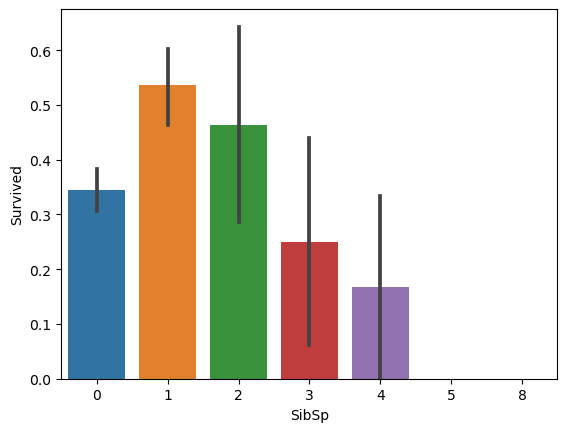

In [8]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df_train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df_train["Survived"][df_train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df_train["Survived"][df_train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df_train["Survived"][df_train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

Parch Feature

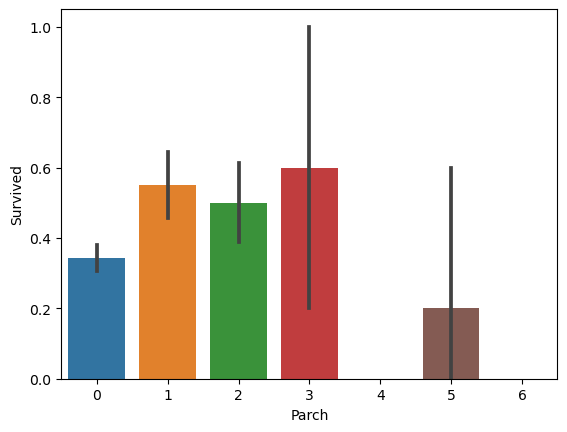

In [9]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=df_train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

Age Feature

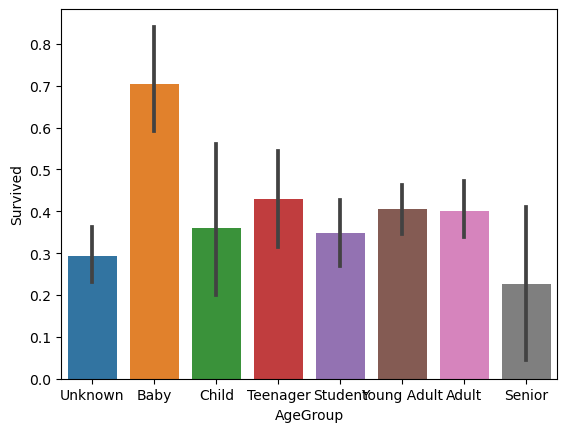

In [10]:
import numpy as np
#sort the ages into logical categories
df_train["Age"] = df_train["Age"].fillna(-0.5)
df_test["Age"] = df_test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df_train['AgeGroup'] = pd.cut(df_train["Age"], bins, labels = labels)
df_test['AgeGroup'] = pd.cut(df_test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df_train)
plt.show()

Babies are more likely to survive than any other age group.

# Data Preprocessing:

In [4]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.transform(df_test[['Age']])

In [5]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [6]:
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

In [7]:
# Encode categorical variables
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
# Ensure the same columns in both datasets
for col in df_train.columns:
    if col not in df_test.columns:
        df_test[col] = 0

for col in df_test.columns:
    if col not in df_train.columns:
        df_train[col] = 0

In [9]:
# Reorder the columns to match exactly
df_train = df_train[df_test.columns]

In [10]:
# Drop columns that are not useful for the model
df_train.drop(columns=['Name', 'Ticket'], inplace=True)
df_test.drop(columns=['Name', 'Ticket'], inplace=True)

In [11]:
# Feature scaling
scaler = StandardScaler()
features_to_scale = ['Age', 'Fare']
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

# Building Predictive Models:

In [12]:
# Separate the target variable from the features
try:
    X_train = df_train.drop(columns=['Survived'])
    y_train = df_train['Survived']

    X_test = df_test.drop(columns=['Survived'])
    y_test = df_test['Survived']
except KeyError as e:
    print(f"Error: {e} not found in the dataset columns.")
    exit()

In [20]:
!pip install lightgbm 

In [13]:
import lightgbm as lgb

In [14]:
# Build predictive models
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


In [15]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [16]:
# Evaluate the models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [17]:
lgb_results = evaluate_model(y_test, y_pred_lgb)
xgb_results = evaluate_model(y_test, y_pred_xgb)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print(f'LightGBM Results: Accuracy={lgb_results[0]}, Precision={lgb_results[1]}, Recall={lgb_results[2]}, F1-score={lgb_results[3]}')
print(f'XGBoost Results: Accuracy={xgb_results[0]}, Precision={xgb_results[1]}, Recall={xgb_results[2]}, F1-score={xgb_results[3]}')

LightGBM Results: Accuracy=0.6626794258373205, Precision=0.0, Recall=0.0, F1-score=0.0
XGBoost Results: Accuracy=0.6674641148325359, Precision=0.0, Recall=0.0, F1-score=0.0
